## 4 kMeans (Mall_Customers)

## Importing the libraries

In [ ]:
!pip install pandas-profiling
!pip install ipywidgets

In [2]:
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
from sklearn.cluster import KMeans
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Importing the dataset

In [3]:
# df = pd.read_csv('./data/Mall_Customers.csv')
df = pd.read_csv('https://docs.google.com/spreadsheets/d/1_VLG-QVuEQFaABcsXxWmG1ASV-SVcEoEvoFDH8pUN4A/gviz/tq?tqx=out:csv&sheet=Mall_Customers')

In [4]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [5]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [6]:
df.dtypes

CustomerID                 int64
Gender                    object
Age                        int64
Annual Income (k$)         int64
Spending Score (1-100)     int64
dtype: object

In [7]:
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

## Visualization the dataset

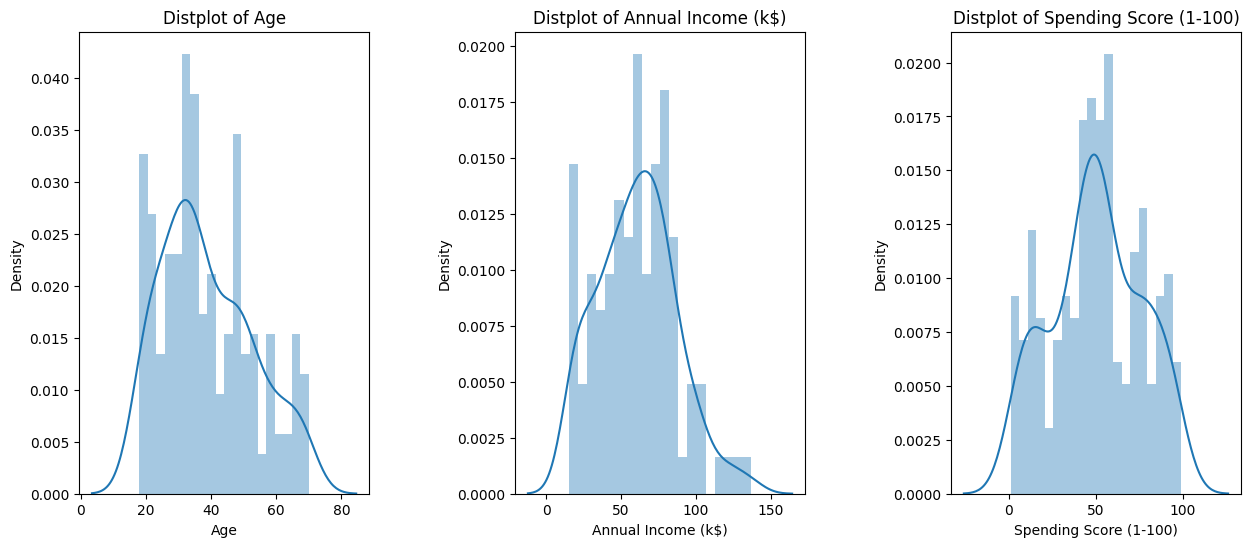

In [8]:
plt.figure(1 , figsize = (15 , 6))
n = 0 
for x in ['Age' , 'Annual Income (k$)' , 'Spending Score (1-100)']:
    n += 1
    plt.subplot(1 , 3 , n)
    plt.subplots_adjust(hspace =0.5 , wspace = 0.5)
    sns.distplot(df[x] , bins = 20)
    plt.title('Distplot of {}'.format(x))
plt.show()

### Relationship between Age, Annual Income, Spending Score

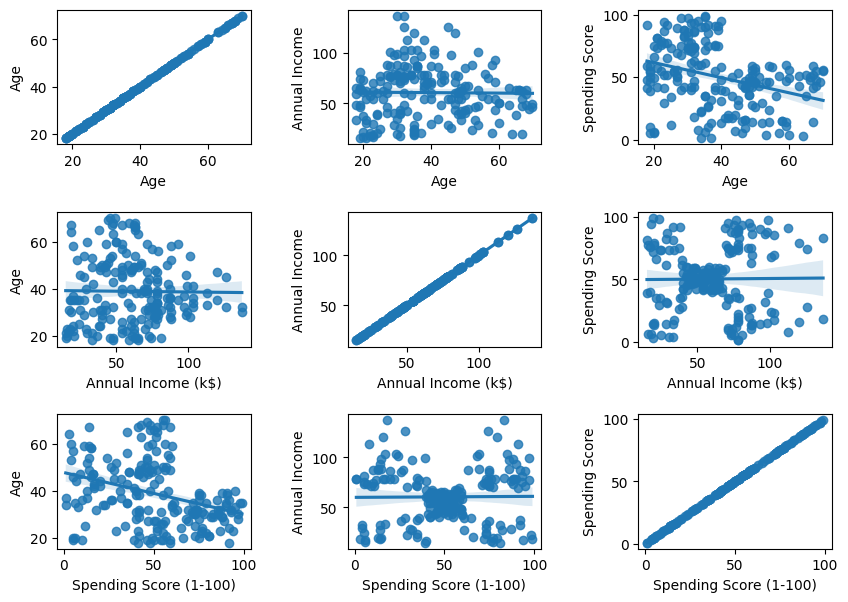

In [9]:
plt.figure(1 , figsize = (10 , 7))
n = 0 
for x in ['Age' , 'Annual Income (k$)' , 'Spending Score (1-100)']:
    for y in ['Age' , 'Annual Income (k$)' , 'Spending Score (1-100)']:
        n += 1
        plt.subplot(3 , 3 , n)
        plt.subplots_adjust(hspace = 0.5 , wspace = 0.5)
        sns.regplot(x = x , y = y , data = df)
        plt.ylabel(y.split()[0]+' '+y.split()[1] if len(y.split()) > 1 else y )
plt.show()

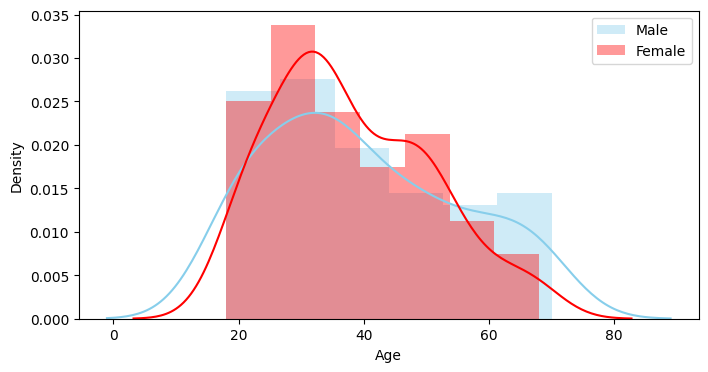

In [10]:
#Gender and Sex
plt.figure(figsize=(8,4))
sns.distplot( df[df["Gender"]=="Male"].Age, color="skyblue",label="Male")
sns.distplot( df[df["Gender"]=="Female"].Age, color="Red",label="Female")
plt.legend();

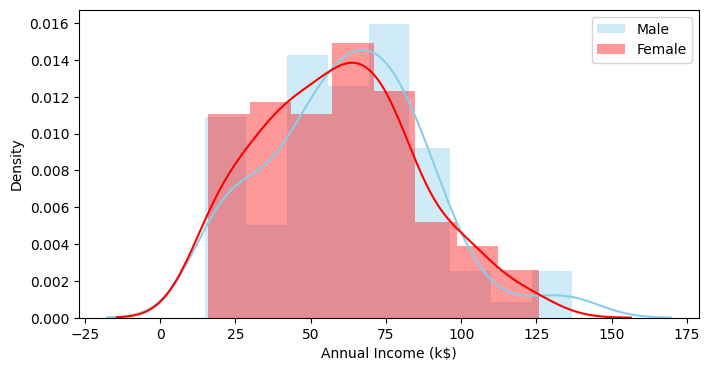

In [11]:
#Gender and Income
plt.figure(figsize=(8,4))
sns.distplot( df[df["Gender"]=="Male"]["Annual Income (k$)"], color="skyblue",label="Male")
sns.distplot( df[df["Gender"]=="Female"]["Annual Income (k$)"], color="Red",label="Female")
plt.legend();

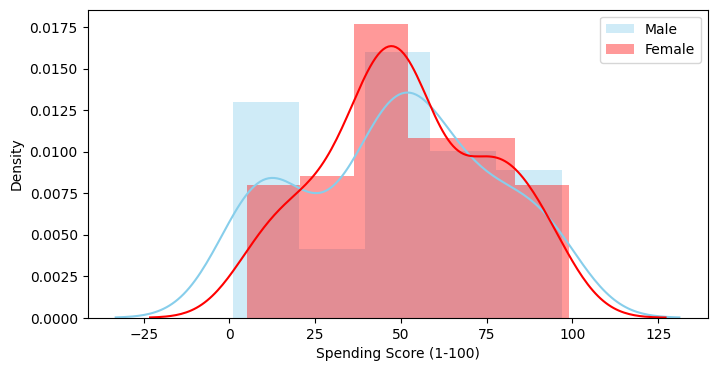

In [12]:
#Spending and Sex
plt.figure(figsize=(8,4))
sns.distplot( df[df["Gender"]=="Male"]["Spending Score (1-100)"], color="skyblue",label="Male")
sns.distplot( df[df["Gender"]=="Female"]["Spending Score (1-100)"], color="Red",label="Female")
plt.legend();

In [13]:
gender = {'Male': 0,'Female': 1} 
df.Gender = [gender[item] for item in df.Gender] 

In [14]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,0,19,15,39
1,2,0,21,15,81
2,3,1,20,16,6
3,4,1,23,16,77
4,5,1,31,17,40


### Correlation Heatmap 

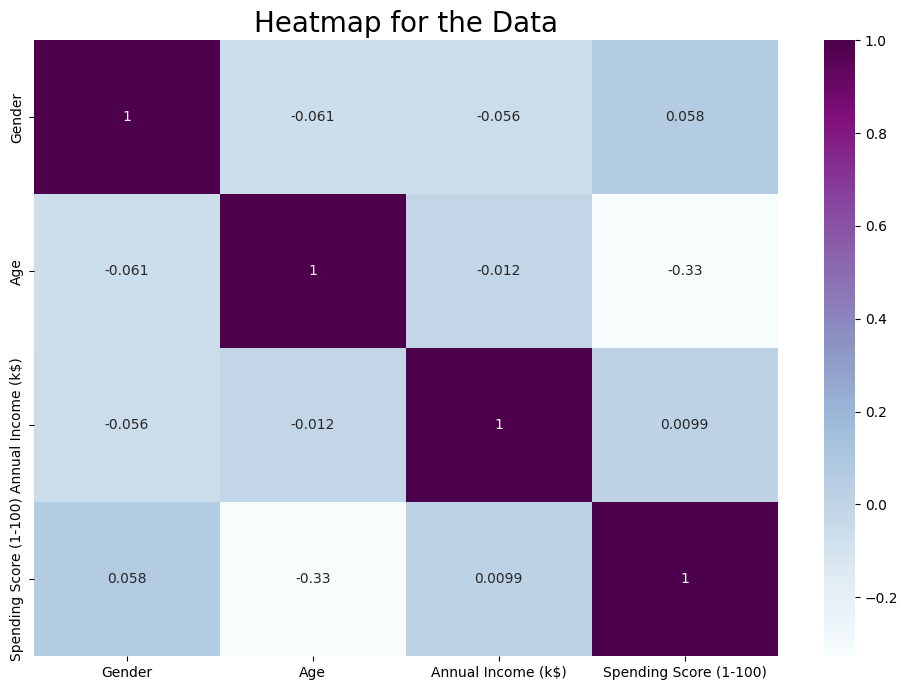

In [15]:
plt.rcParams['figure.figsize'] = (12, 8)
sns.heatmap(df.drop("CustomerID", axis=1).corr(), cmap = 'BuPu', annot = True)
plt.title('Heatmap for the Data', fontsize = 20)
plt.show()

สำหรับ kMean ข้อมูลที่ใช้จำเป็นต้องเป็น numerical

In [16]:
X = df.drop(["Gender","CustomerID"], axis=1) 
X.head()

,Age,Annual Income (k$),Spending Score (1-100)
0,19,15,39
1,21,15,81
2,20,16,6
3,23,16,77
4,31,17,40


In [17]:
from ydata_profiling import ProfileReport
ProfileReport(df)

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

## Feature Scaling

In [18]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_standard=scaler.fit_transform(X)

In [19]:
from sklearn.cluster import KMeans
km = KMeans(n_clusters=3)
km.fit(X_standard)
label = km.predict(X_standard)
centers_standard = km.cluster_centers_

In [20]:
from mpl_toolkits.mplot3d import Axes3D
import ipywidgets as widgets
from IPython.display import display

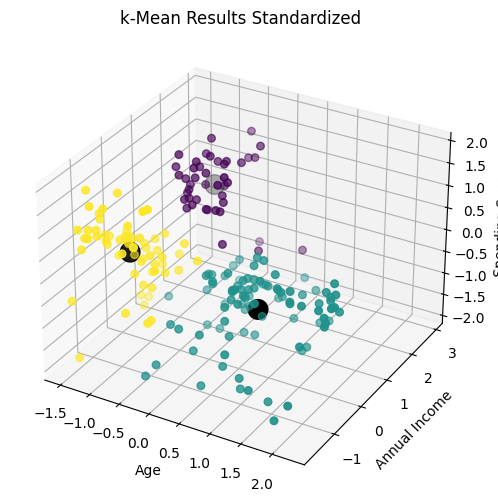

In [21]:
fig = plt.figure(1, figsize=(6,6))
ax = fig.add_subplot(projection='3d')
ax.scatter(X_standard[:, 0], X_standard[:, 1], X_standard[:, 2], c=label, s=30)
ax.scatter (centers_standard[:,0],centers_standard[:,1],centers_standard[:,2], c='black',s=200)
ax.set_title("k-Mean Results Standardized")
ax.set_xlabel("Age")
ax.set_ylabel("Annual Income")
ax.set_zlabel("Spending Score")

plt.show()

เปลี่ยนข้อมูลกลับไป scale เดิม

In [22]:
centers_original = scaler.inverse_transform(centers_standard)
X_original = scaler.inverse_transform(X_standard) # จริงๆใช้ค่า X ตั้งต้นก็ได้

In [23]:
pd.DataFrame(centers_original, columns=X.columns) #ใส่ชื่อ column เดิมดู

,Age,Annual Income (k$),Spending Score (1-100)
0,33.325581,88.511628,77.813953
1,50.563830,59.361702,33.340426
2,25.142857,43.269841,56.507937


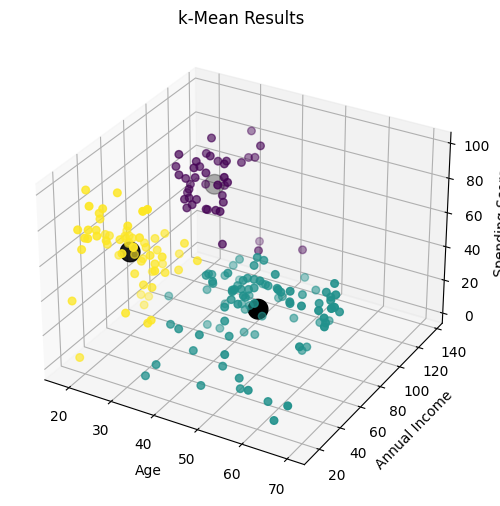

In [24]:
fig = plt.figure(1, figsize=(6,6))
ax = fig.add_subplot(projection='3d')
ax.scatter(X_original[:, 0], X_original[:, 1], X_original[:, 2], c=label, s=30)
ax.scatter (centers_original[:,0],centers_original[:,1],centers_original[:,2], c='black',s=200)
ax.set_title("k-Mean Results")
ax.set_xlabel("Age")
ax.set_ylabel("Annual Income")
ax.set_zlabel("Spending Score")

plt.show()

----
## Choosing proper *k*

ทดลอง cluster ด้วยค่า k หลายๆค่าและเลือกอันที่ inertia เหมาะสมที่สุด (ที่ **"elbow"**)

In [25]:
inertia_list = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, random_state = 42)
    kmeans.fit(X_standard)
    # inertia method returns wcss for that model
    inertia_list.append(kmeans.inertia_)

Text(0, 0.5, 'Inertia')

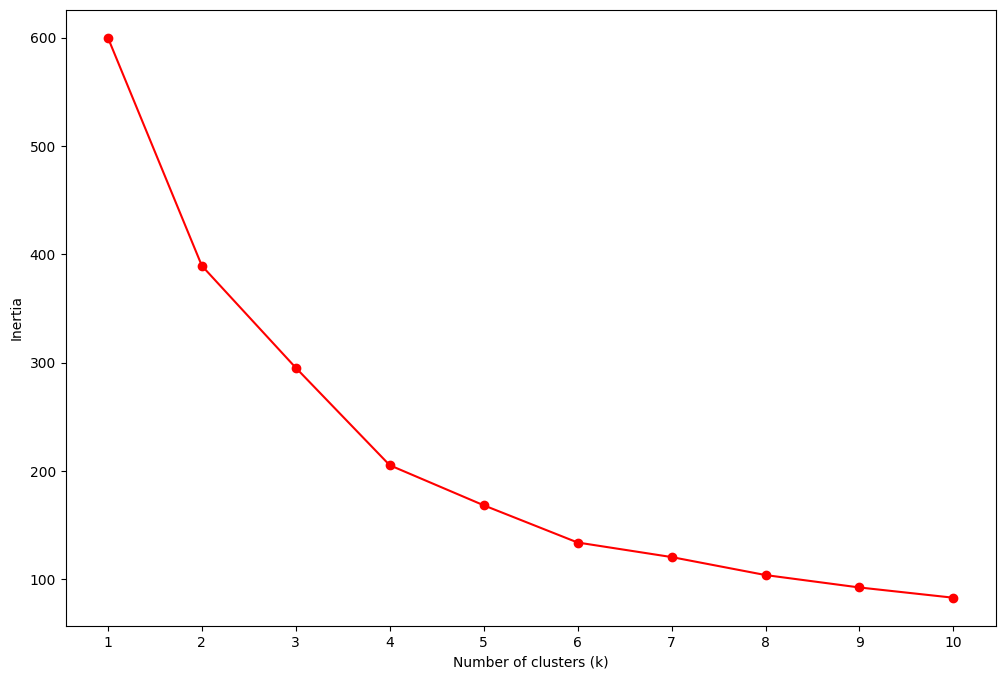

In [26]:
plt.plot(inertia_list,marker='o',color='red')
plt.xticks(range(0,10), [str(i) for i in range (1,11)])
plt.xlabel("Number of clusters (k)")
plt.ylabel("Inertia")

จะเห็นได้ว่าค่าของ k=2,4 เป็นอีกตัวเลือกหนึ่งที่น่าสนใจ

In [27]:
km2 = KMeans(n_clusters=4)
km2.fit(X_standard)
label2 = km2.predict(X_standard)
centers_standard2 = km2.cluster_centers_

In [28]:
centers_original2 = scaler.inverse_transform(centers_standard2)

In [29]:
pd.DataFrame(centers_original2, columns=X.columns) #ใส่ชื่อ column เดิมดู

,Age,Annual Income (k$),Spending Score (1-100)
0,25.438596,40.000000,60.298246
1,39.368421,86.500000,19.578947
2,53.984615,47.707692,39.969231
3,32.875000,86.100000,81.525000


In [30]:
from mpl_toolkits.mplot3d import Axes3D
import ipywidgets as widgets
from IPython.display import display

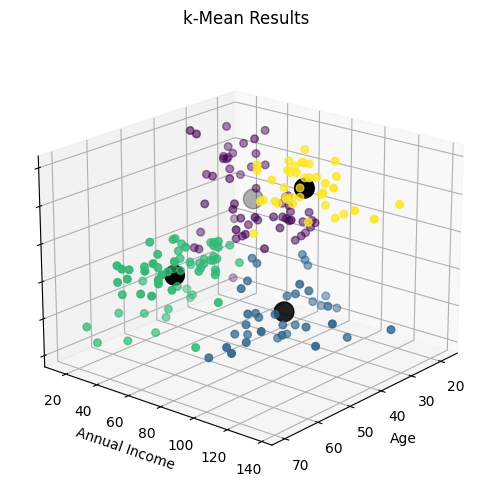

In [31]:
fig = plt.figure(2, figsize=(6,6))
ax = fig.add_subplot(projection='3d')
ax.scatter(X_original[:, 0], X_original[:, 1], X_original[:, 2], c=label2, s=30)
ax.scatter (centers_original2[:,0],centers_original2[:,1],centers_original2[:,2], c='black',s=200)
ax.set_title("k-Mean Results")
ax.set_xlabel("Age")
ax.set_ylabel("Annual Income")
ax.set_zlabel("Spending Score")
ax.w_zaxis.set_ticklabels([])

angle1 = 20
angle2 = 40
ax.view_init(angle1, angle2)

plt.show()

*Code ของ widget นี้ปรับมาจาก (https://stackoverflow.com/questions/42998009/clear-matplotlib-figure-in-jupyter-python-notebook)*

----
## Silouette Score

เพื่อช่วยในการตัดสินใจ เราอาจนำ silouette score เข้ามาช่วยพิจารณาด้วย 
*(code ของ plot ปรับจาก https://scikit-learn.org/stable/modules/generated/sklearn.metrics.silhouette_score.html)*

For n_clusters = 2 The average silhouette_score is : 0.33547192894004574
For n_clusters = 3 The average silhouette_score is : 0.35880977401117803
For n_clusters = 4 The average silhouette_score is : 0.4039582785148566
For n_clusters = 5 The average silhouette_score is : 0.41664341513732767
For n_clusters = 6 The average silhouette_score is : 0.42742814991580175
For n_clusters = 7 The average silhouette_score is : 0.417231894954916
For n_clusters = 8 The average silhouette_score is : 0.408443059554235
For n_clusters = 9 The average silhouette_score is : 0.4188078334648395


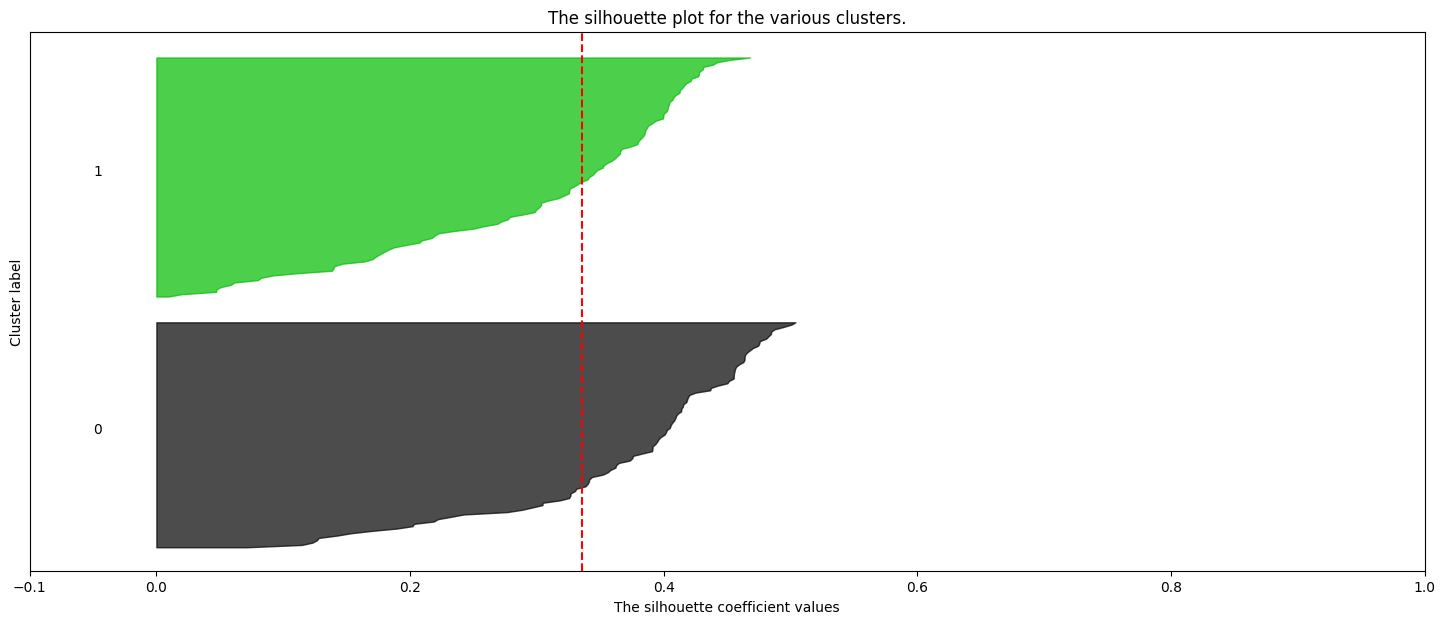

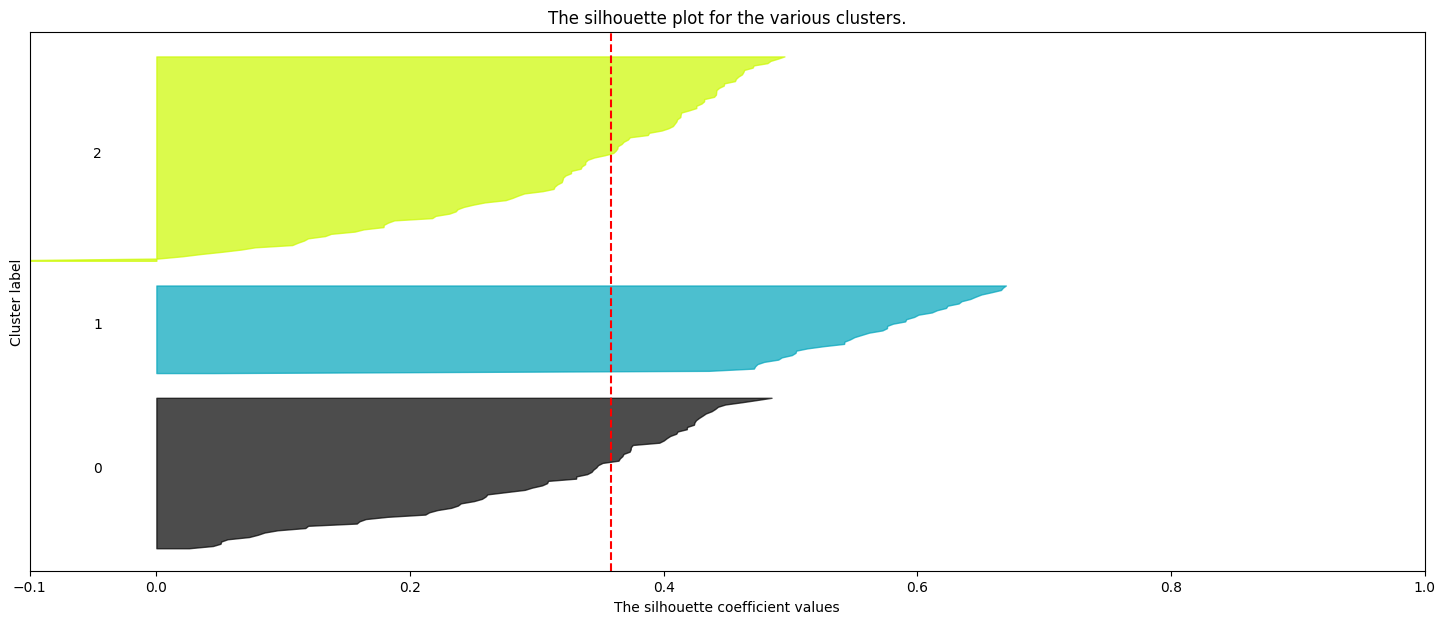

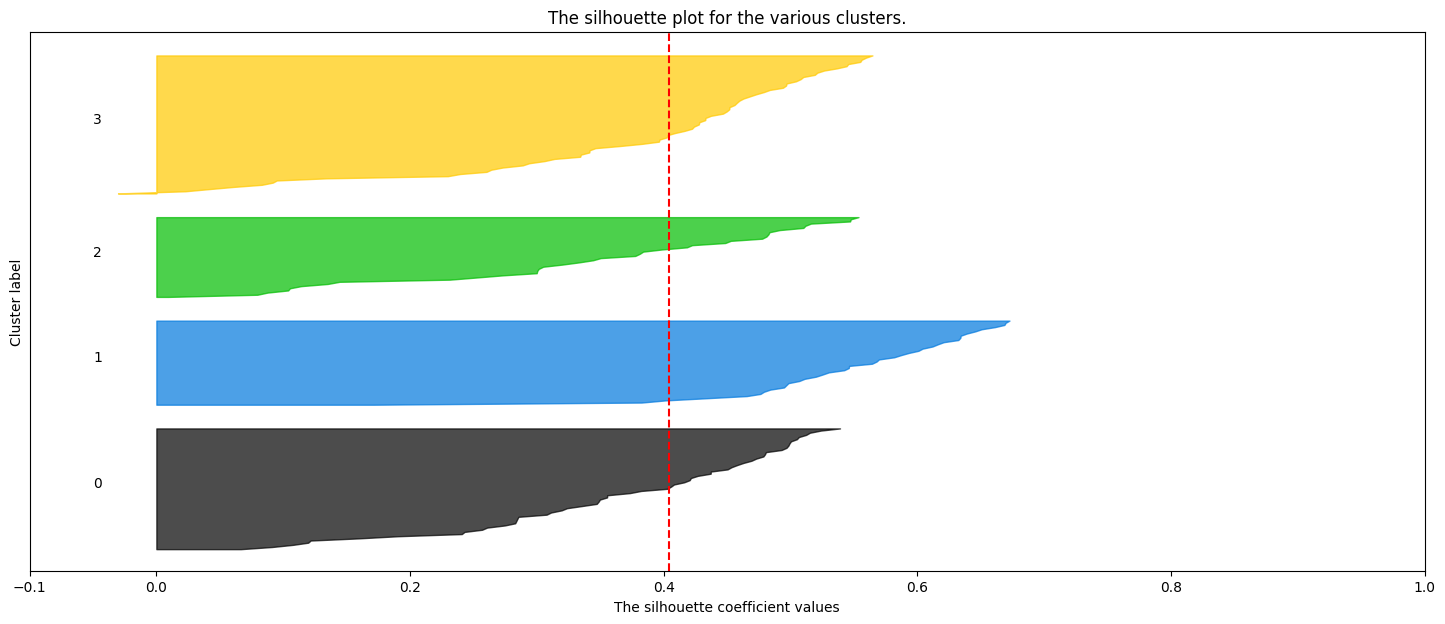

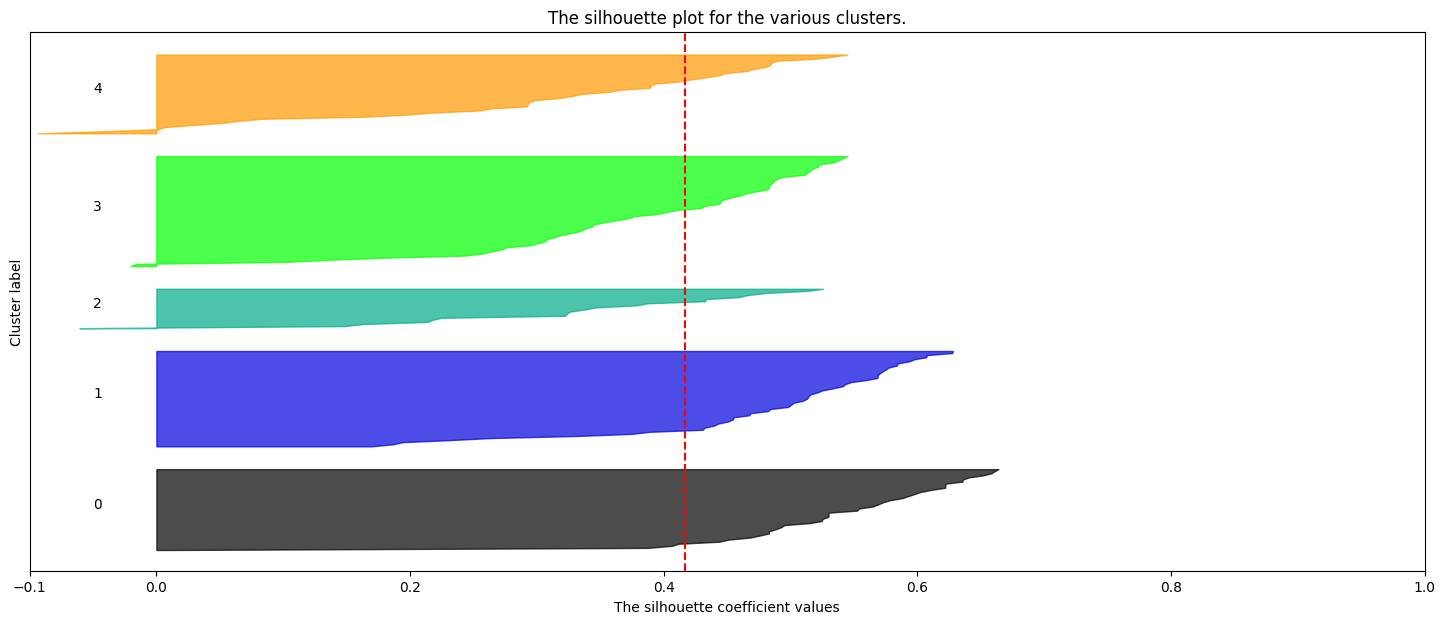

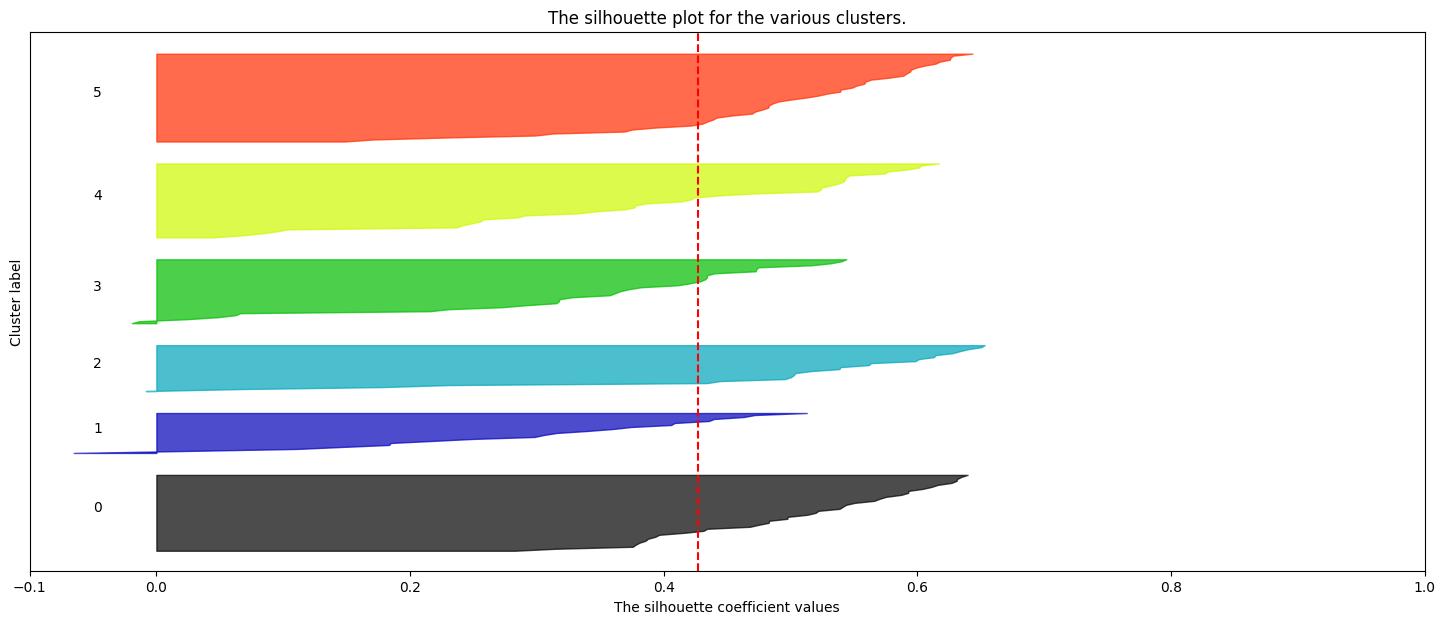

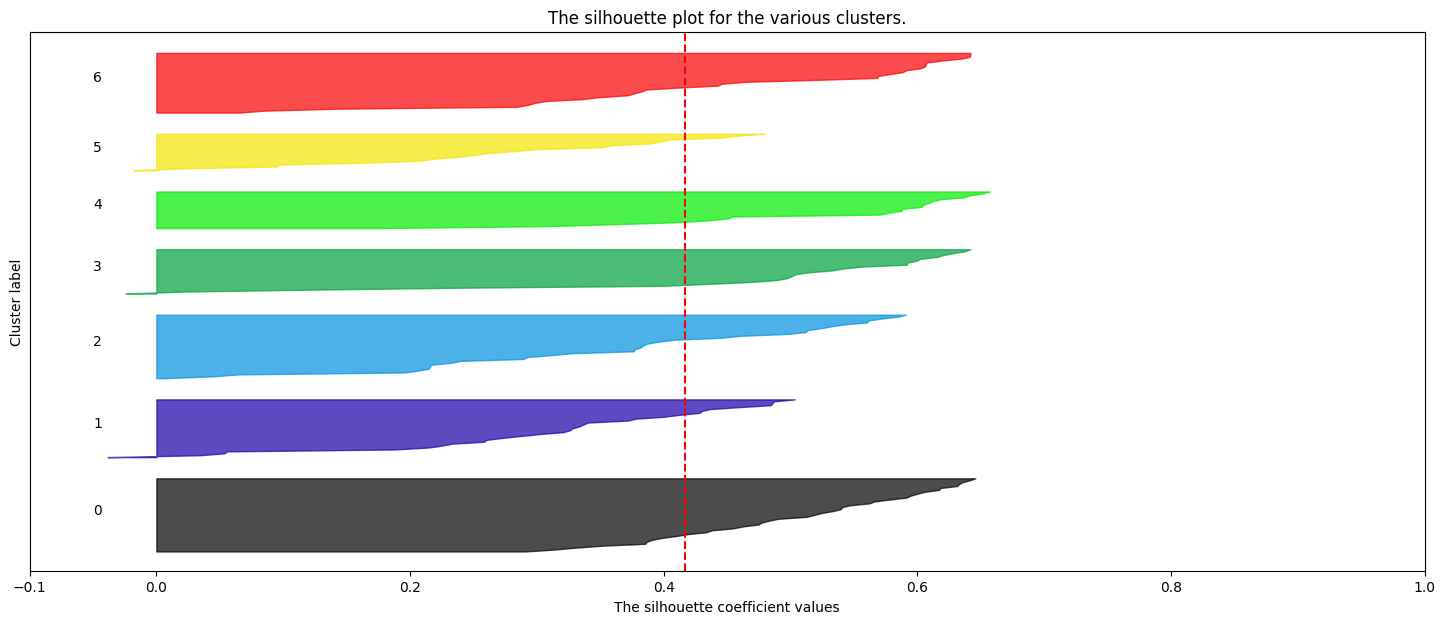

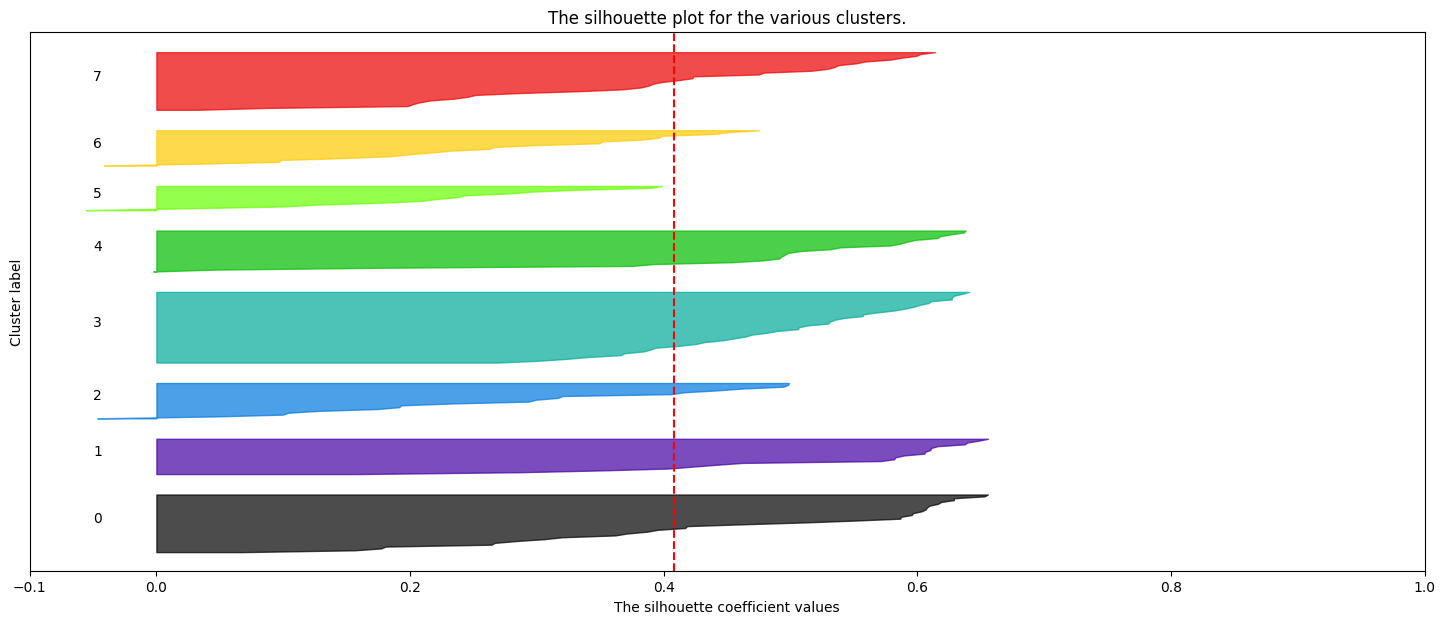

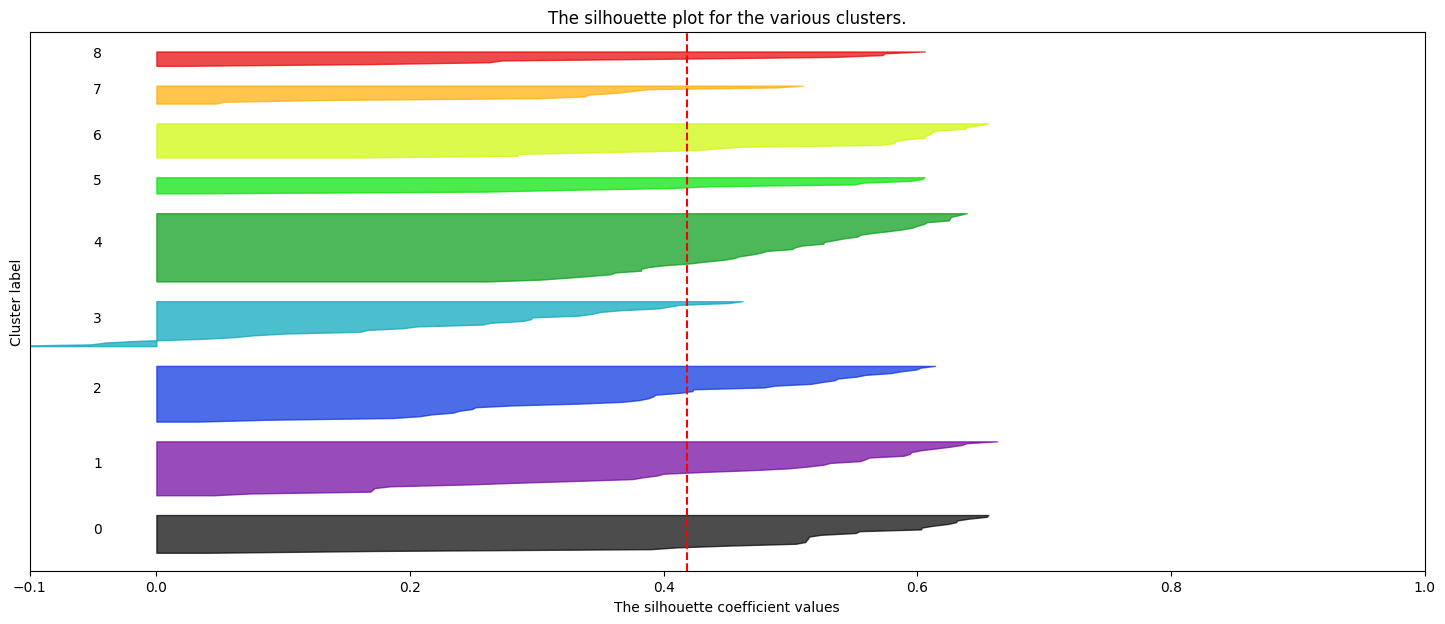

In [32]:
%matplotlib inline
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.cm as cm

range_n_clusters = range(2,10)

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, ax1 = plt.subplots(1, 1)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X_standard) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X_standard)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X_standard, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X_standard, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])


plt.show()